In [1]:
'''MAY-JUNE 2020:
WITH THIS CODE, I PLOT THE RASTER FOR THE E-RETINA SPIKES
'''

'MAY-JUNE 2020:\nWITH THIS CODE, I PLOT THE RASTER FOR THE E-RETINA SPIKES\n'

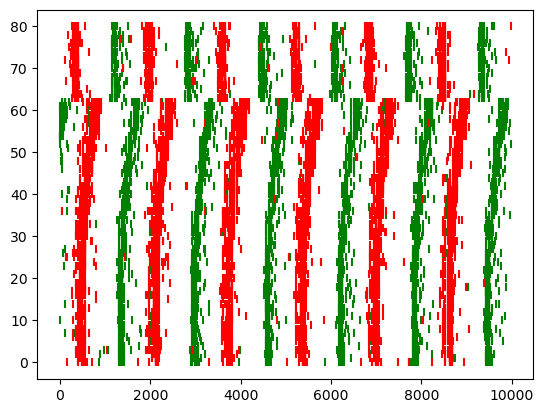

In [164]:
#!/usr/bin/env python
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import math
from scipy.optimize import curve_fit


'''Retinal outputs at a single frequency imported'''

import vertical_bars_neg_vel2  
import vertical_bars_pos_vel2


'''DO NOT change the retina data parameters!!!'''
retina_grid_size = 81 ##DONT CHANGE RETINA PARAMETERS!!!
retWinColLen = 9
retWinRowLen = 9
retTotalLen = 19

eventos_off = []
eventos_on = []

for loop in range(0, retWinRowLen):
    retCurrentPointer = retTotalLen * loop
    for current_indices in range(retCurrentPointer, retCurrentPointer + retWinColLen):
        eventos_off.append(np.asarray(vertical_bars_neg_vel2.eventos, dtype=object)[current_indices])
        eventos_on.append(np.asarray(vertical_bars_pos_vel2.eventos, dtype=object)[current_indices])
        
for y in range(len(eventos_on)):
    eventosonlen=len(eventos_on[y])
    yaxis=[y]*eventosonlen
    plt.scatter(eventos_on[y],yaxis,marker='|',color='green')
    
for x in range(len(eventos_off)):
    eventosofflen=len(eventos_off[x])
    yaxis=[x]*eventosofflen
    plt.scatter(eventos_off[x],yaxis,marker='|',color='red')

plt.show()

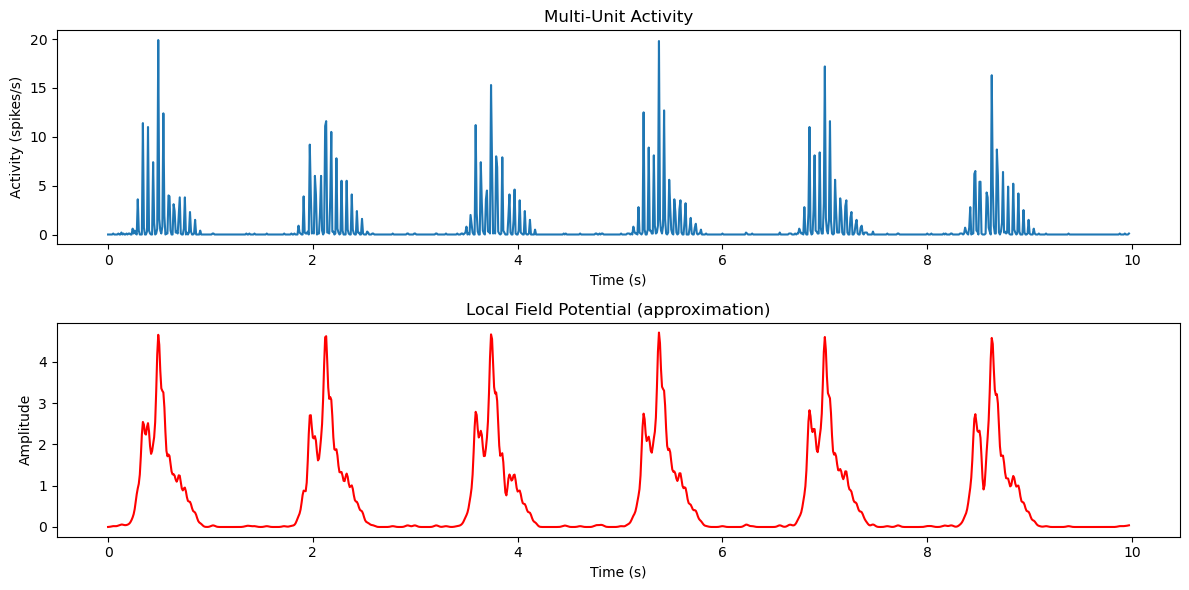

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def calculate_mua(events, bin_size=10, sampling_rate=1000):
    """
    Calculate the Multi-Unit Activity (MUA).
    
    Args:
    - events: List of lists with event timestamps.
    - bin_size: Bin size for histogram in milliseconds.
    - sampling_rate: Sampling rate in Hz.
    
    Returns:
    - mua_signal: The MUA signal as a 1D numpy array.
    - time_vector: Corresponding time vector in seconds.
    """
    # Flatten the list of lists into a single array of events
    all_events = np.concatenate(events)

    # Define the total recording duration based on the last event
    total_duration_ms = all_events.max()

    # Create a time vector with the defined bin size
    time_vector = np.arange(0, total_duration_ms + bin_size, bin_size)
    
    # Histogram of the spike events into bins
    mua_signal, _ = np.histogram(all_events, bins=time_vector)

    # Convert bin counts to rate (spikes per second)
    mua_signal = mua_signal * (1000 / bin_size) * (1 / sampling_rate)

    # Convert time vector to seconds for plotting
    time_vector = time_vector / 1000.0

    return mua_signal, time_vector

def plot_signals(time_vector, mua_signal, lfp_signal):
    """
    Plot MUA and LFP signals.
    
    Args:
    - time_vector: Time vector in seconds.
    - mua_signal: MUA signal array.
    - lfp_signal: LFP-like signal array.
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time_vector[:-1], mua_signal, label='MUA')
    plt.title('Multi-Unit Activity')
    plt.xlabel('Time (s)')
    plt.ylabel('Activity (spikes/s)')

    plt.subplot(2, 1, 2)
    plt.plot(time_vector[:-1], lfp_signal, label='LFP', color='r')
    plt.title('Local Field Potential (approximation)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Your data structure

# Example usage with your data
mua, time_vec = calculate_mua(eventos_off)
lfp = gaussian_filter1d(mua, sigma=2)  # Approximate LFP by smoothing the MUA

plot_signals(time_vec, mua, lfp)


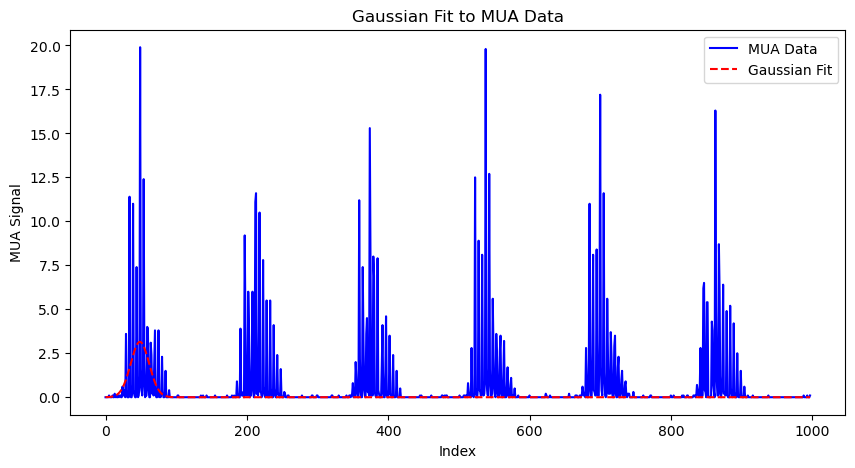

(3.1475073602513852, 48.7177132092252, 13.101191112947646)

In [166]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data provided
mua_data = np.array(mua)
# Simulated data points
x_data = np.linspace(0, len(mua_data) - 1, len(mua_data))

# Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Initial guesses for the fit parameters
initial_guesses = [1, np.argmax(mua_data), 50]  # Amplitude, mean, stddev

# Curve fitting for MUA data
params_mua, cov_mua = curve_fit(gaussian, x_data, mua_data, p0=initial_guesses)

# Plotting the MUA data and the fit
plt.figure(figsize=(10, 5))
plt.plot(x_data, mua_data, 'b-', label='MUA Data')
plt.plot(x_data, gaussian(x_data, *params_mua), 'r--', label='Gaussian Fit')
plt.title('Gaussian Fit to MUA Data')
plt.xlabel('Index')
plt.ylabel('MUA Signal')
plt.legend()
plt.show()

# Extracted parameters
amplitude_mua, mean_mua, stddev_mua = params_mua
amplitude_mua, mean_mua, stddev_mua


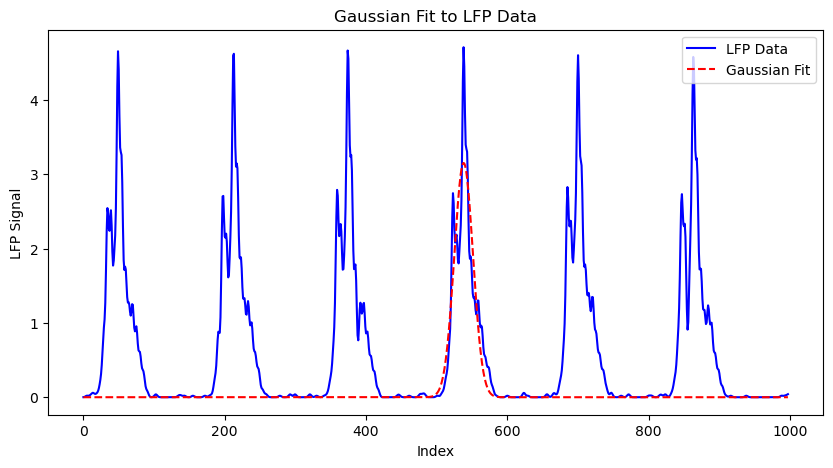

(3.1524598091541454, 538.1332150447213, 13.240405728979683)

In [176]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data provided
lfp_data = np.array(lfp)
# Simulated data points
x_data = np.linspace(0, len(lfp_data) - 1, len(lfp_data))

# Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Initial guesses for the fit parameters
initial_guesses = [1, np.argmax(lfp_data), 50]  # Amplitude, mean, stddev

# Curve fitting for MUA data
params_lfp, cov_lfp = curve_fit(gaussian, x_data, lfp_data, p0=initial_guesses)

# Plotting the MUA data and the fit
plt.figure(figsize=(10, 5))
plt.plot(x_data, lfp_data, 'b-', label='LFP Data')
plt.plot(x_data, gaussian(x_data, *params_lfp), 'r--', label='Gaussian Fit')
plt.title('Gaussian Fit to LFP Data')
plt.xlabel('Index')
plt.ylabel('LFP Signal')
plt.legend()
plt.show()

# Extracted parameters
amplitude_lfp, mean_lfp, stddev_lfp = params_lfp
amplitude_lfp, mean_lfp, stddev_lfp


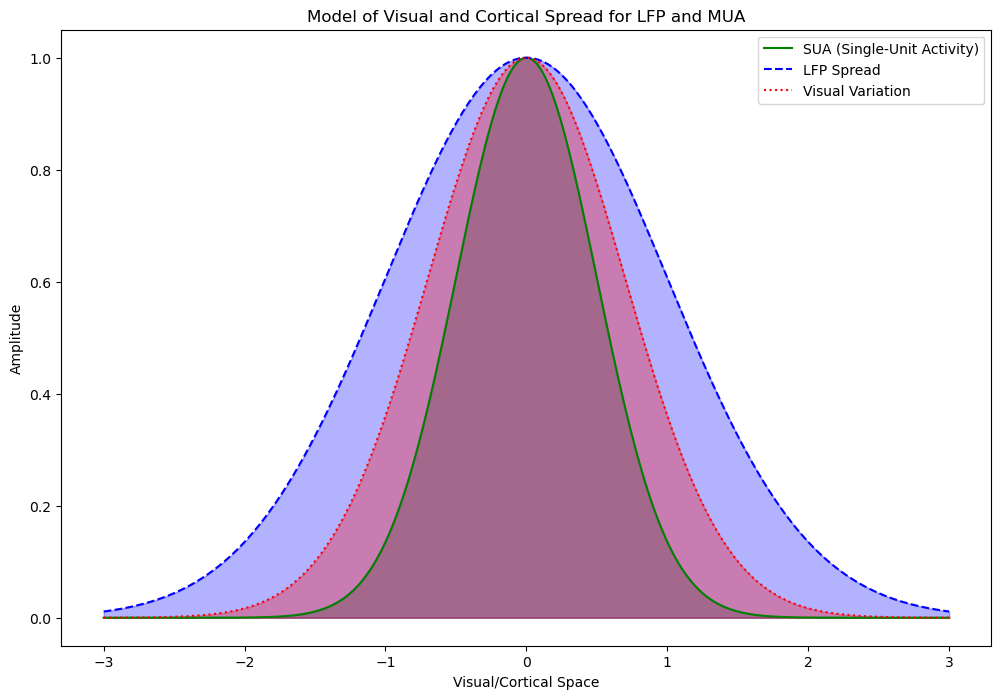

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Define Gaussian function
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

# Parameters for the Gaussians
x = np.linspace(-3, 3, 300)
mu = 0  # Mean of the distribution
sigma_sua = 0.5  # Standard deviation for SUA
sigma_lfp = 1.0  # Standard deviation for LFP spread
sigma_variation = 0.7  # Standard deviation for visual variation

# Create Gaussians
g_sua = gaussian(x, mu, sigma_sua)
g_lfp = gaussian(x, mu, sigma_lfp)
g_variation = gaussian(x, mu, sigma_variation)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x, g_sua, label='SUA (Single-Unit Activity)', color='green')
plt.plot(x, g_lfp, linestyle='dashed', label='LFP Spread', color='blue')
plt.plot(x, g_variation, linestyle='dotted', label='Visual Variation', color='red')

plt.fill_between(x, 0, g_sua, color='green', alpha=0.3)
plt.fill_between(x, 0, g_lfp, color='blue', alpha=0.3)
plt.fill_between(x, 0, g_variation, color='red', alpha=0.3)

plt.title('Model of Visual Spread for LFP and MUA')
plt.xlabel('Visual/Cortical Space')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


Visual spread parameter for MUA (vMUA): 13.101191112947646
Visual spread parameter for LFP (vLFP): 13.240405728979683
Spatial spread parameter for LFP (cLFP): 4.309115037420617


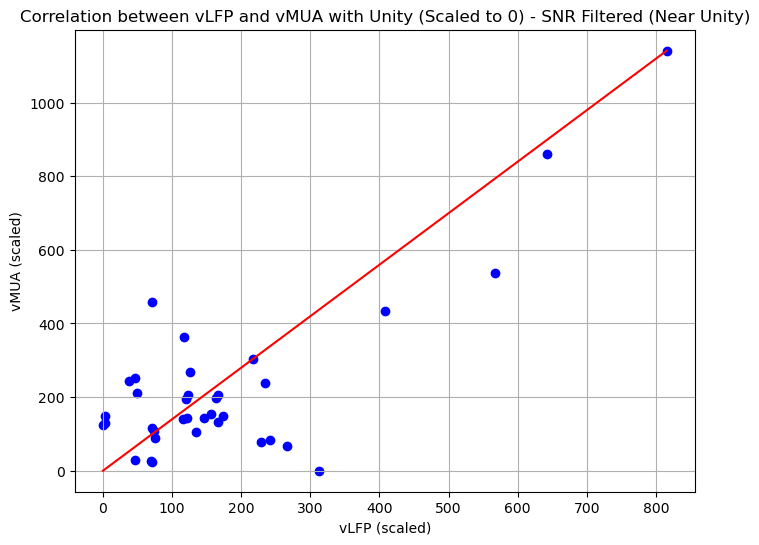

In [162]:
vMUA = stddev_mua
vLFP = stddev_lfp
cMUA = 0.060 # assumption
MF = 2.25

cLFP = np.sqrt(MF**2 * vLFP**2 - MF**2 * vMUA**2 + cMUA**2)

# Define the range of y values (distance in degrees of visual angle)
y_values = np.linspace(-100, 100, 10)

# Define Gaussian functions for gcMUA(y) and gcLFP(y)
def gaussian(x, sigma):
    return np.exp(-x**2 / (2 * sigma**2))


print(f"Visual spread parameter for MUA (vMUA): {vMUA}")
print(f"Visual spread parameter for LFP (vLFP): {vLFP}")
print(f"Spatial spread parameter for LFP (cLFP): {cLFP}")
# Calculate vMUA and vLFP
vMUA = [np.max(row) - np.min(row) for row in eventos_on]
vLFP = [np.max(row) - np.min(row) for row in eventos_off]

# Calculate SNR for vMUA and vLFP
SNR_vMUA = [np.abs(np.max(row) - np.min(row)) / np.std(row) for row in eventos_on]
SNR_vLFP = [np.abs(np.max(row) - np.min(row)) / np.std(row) for row in eventos_off]
# Filter data points based on SNR criterion
vMUA_filtered = [vMUA[i] for i in range(len(vMUA)) if SNR_vMUA[i] >= 1.5]
vLFP_filtered = [vLFP[i] for i in range(len(vLFP)) if SNR_vLFP[i] >= 1.5]

# Scale to 0
vMUA_scaled = np.array(vMUA_filtered) - min(vMUA_filtered)
vLFP_scaled = np.array(vLFP_filtered) - min(vLFP_filtered)
# Calculate the absolute difference from unity line
abs_diff = np.abs(vMUA_scaled - vLFP_scaled)

# Define a threshold for the absolute difference
threshold = 500  # You can adjust this threshold as needed

# Filter data points based on the absolute difference criterion
vMUA_filtered_near_unity = [vMUA_scaled[i] for i in range(len(vMUA_scaled)) if abs_diff[i] <= threshold]
vLFP_filtered_near_unity = [vLFP_scaled[i] for i in range(len(vLFP_scaled)) if abs_diff[i] <= threshold]

if len(vMUA_filtered_near_unity) > 0 and len(vLFP_filtered_near_unity) > 0:
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(vLFP_filtered_near_unity, vMUA_filtered_near_unity, color='blue')
    plt.plot([0, max(vLFP_filtered_near_unity)], [0, max(vMUA_filtered_near_unity)], color='red')
    plt.title('Correlation between vLFP and vMUA with Unity (Scaled to 0) - SNR Filtered (Near Unity)')
    plt.xlabel('vLFP (scaled)')
    plt.ylabel('vMUA (scaled)')
    plt.grid(True)
    plt.show()
else:
    print("No data points remaining after filtering.")

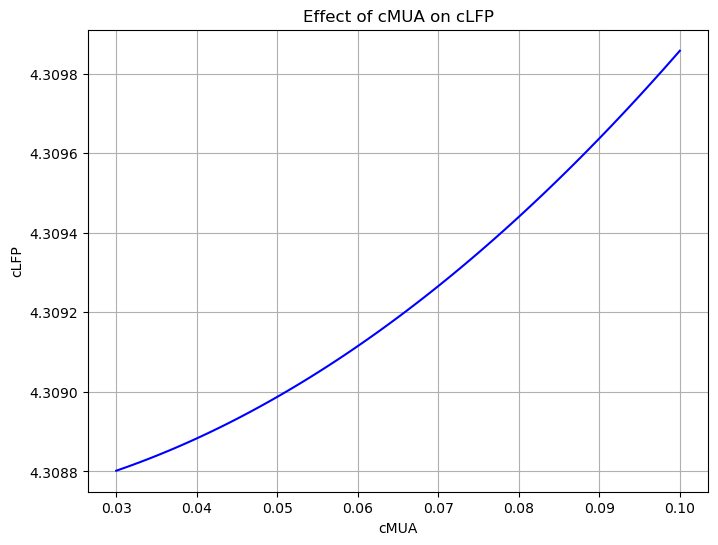

In [173]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of cMUA values
cMUA_values = np.linspace(0.03, 0.1, 100)

# Define spatial spread parameters
vMUA = stddev_mua
vLFP = stddev_lfp
MF = 2.25

# Calculate cLFP for each cMUA value
cLFP_values = np.sqrt(MF**2 * vLFP**2 - MF**2 * vMUA**2 + cMUA_values**2)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(cMUA_values, cLFP_values, color='blue')
plt.title('Effect of cMUA on cLFP')
plt.xlabel('cMUA')
plt.ylabel('cLFP')
plt.grid(True)
plt.show()